In [ ]:
##from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('/donnee.csv')

In [ ]:
data

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10
...,...,...,...,...,...,...,...,...
487,1,5.0,2.5,1800000,1890,3073,586,76
488,1,2.0,1.0,695000,1923,1045,665,106
489,1,3.0,2.0,1650000,1922,1483,1113,106
490,1,1.0,1.0,649000,1983,850,764,163


creation des x et des y

In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
X


,in_sf,beds,bath,price,year_built,sqft,price_per_sqft
0,0,2.0,1.0,999000,1960,1000,999
1,0,2.0,2.0,2750000,2006,1418,1939
2,0,2.0,2.0,1350000,1900,2150,628
3,0,1.0,1.0,629000,1903,500,1258
4,0,0.0,1.0,439000,1930,500,878
...,...,...,...,...,...,...,...
487,1,5.0,2.5,1800000,1890,3073,586
488,1,2.0,1.0,695000,1923,1045,665
489,1,3.0,2.0,1650000,1922,1483,1113
490,1,1.0,1.0,649000,1983,850,764


In [ ]:
y

0       10
1        0
2        9
3        9
4       10
      ... 
487     76
488    106
489    106
490    163
491    216
Name: elevation, Length: 492, dtype: int64

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X, y)


DecisionTreeClassifier()

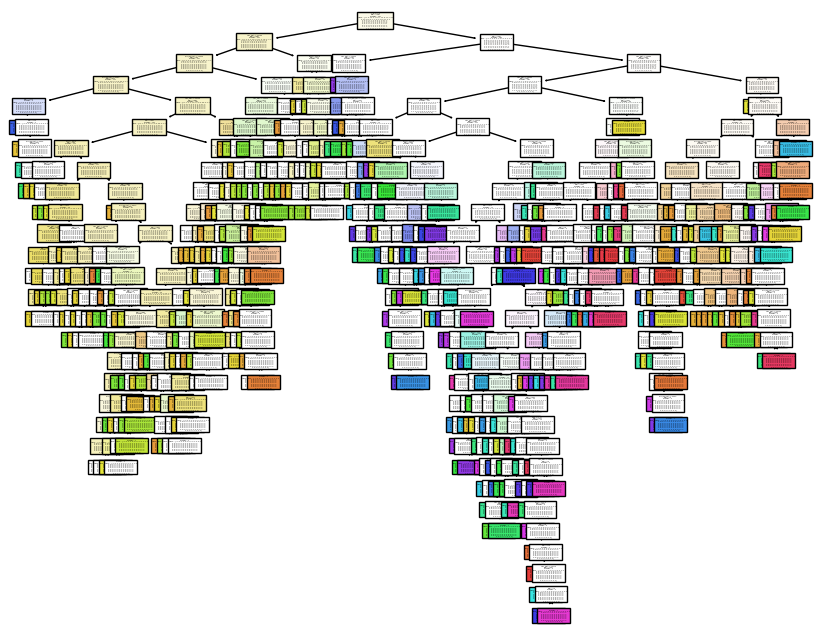

In [ ]:
fig = plt.figure(figsize=(10, 8))
_ = tree.plot_tree(clf, feature_names=X.columns, filled=True)
plt.show()

Utilisation de KNN avec k = 7

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, y)
score_k7 = knn.score(X, y)
print("Score KNN avec k=7:", score_k7)

Score KNN avec k=7: 0.2703252032520325


Boucle pour trouver le meilleur score KNN avec k de 1 à 20


In [ ]:
#1 création de fonction 
def determiner_meilleur_score(s):
    meilleur_score = np.max(s)
    meilleur_k = s.index(meilleur_score) + 1
    return (print("Le meilleur score est :", meilleur_score)), (print("Le meilleur k est :", meilleur_k))


In [ ]:
#création de boucle
k = range(1, 30)
scores = []

# Calcul des scores pour différentes valeurs de k
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    sc = knn.score(X,y)
    scores.append(sc)

determiner_meilleur_score(scores)

Le meilleur score est : 0.9288617886178862
Le meilleur k est : 1


(None, None)

Affichage du schéma des scores selon k

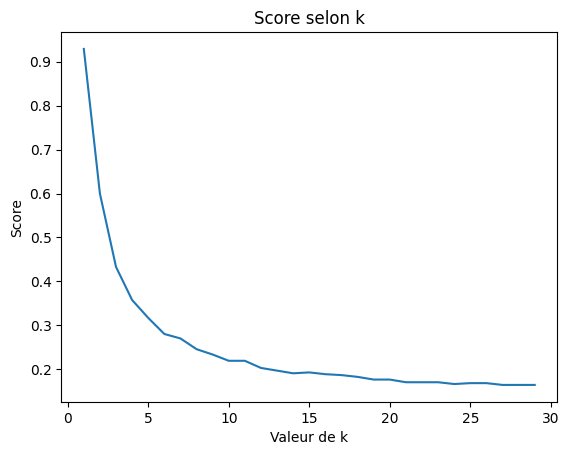

In [ ]:
plt.plot(k, scores)
plt.xlabel('Valeur de k')
plt.ylabel('Score')
plt.title('Score selon k')
plt.show()

afficher le score de chaque k

In [ ]:
for k_val, score in zip(k, scores):
    print("Score pour k =", k_val, ": ", score)
#nous utilisons la fonction zip() pour itérer simultanément sur deux listes : k (les valeurs de k) et scores (les scores correspondants pour chaque valeur de k).

Score pour k = 1 :  0.9288617886178862
Score pour k = 2 :  0.5995934959349594
Score pour k = 3 :  0.4329268292682927
Score pour k = 4 :  0.35772357723577236
Score pour k = 5 :  0.3170731707317073
Score pour k = 6 :  0.2804878048780488
Score pour k = 7 :  0.2703252032520325
Score pour k = 8 :  0.2459349593495935
Score pour k = 9 :  0.23373983739837398
Score pour k = 10 :  0.21951219512195122
Score pour k = 11 :  0.21951219512195122
Score pour k = 12 :  0.2032520325203252
Score pour k = 13 :  0.19715447154471544
Score pour k = 14 :  0.1910569105691057
Score pour k = 15 :  0.19308943089430894
Score pour k = 16 :  0.18902439024390244
Score pour k = 17 :  0.18699186991869918
Score pour k = 18 :  0.18292682926829268
Score pour k = 19 :  0.17682926829268292
Score pour k = 20 :  0.17682926829268292
Score pour k = 21 :  0.17073170731707318
Score pour k = 22 :  0.17073170731707318
Score pour k = 23 :  0.17073170731707318
Score pour k = 24 :  0.16666666666666666
Score pour k = 25 :  0.16869918699

tester des nouvelle donnée afficher les résultat en utilisant une boucle qui affiche chaque résultat

In [ ]:
X_new = pd.DataFrame({
    'in_sf': [1, 0],
    'beds': [3.0, 2.0],
    'bath': [2.0, 1.5],
    'price': [1500000, 800000],
    'year_built': [1995, 2010],
    'sqft': [2000, 1200],
    'price_per_sqft': [750, 666]
})

# Prédictions sur les nouvelles données
predictions = knn.predict(X_new)

# Affichage des prédictions
for i, prediction in enumerate(predictions):
    print("Nouvelle donnée:", X_new.iloc[i])
    print("Prédiction:", prediction)
    print("--------")

Nouvelle donnée: in_sf                   1.0
beds                    3.0
bath                    2.0
price             1500000.0
year_built           1995.0
sqft                 2000.0
price_per_sqft        750.0
Name: 0, dtype: float64
Prédiction: 10
--------
Nouvelle donnée: in_sf                  0.0
beds                   2.0
bath                   1.5
price             800000.0
year_built          2010.0
sqft                1200.0
price_per_sqft       666.0
Name: 1, dtype: float64
Prédiction: 10
--------


créer x random de 8 et afficher la prédeiction avec k = 1

In [ ]:
# Entraînement du modèle KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, y)

# Création de nouvelles données aléatoires
X_new = pd.DataFrame(np.random.rand(8, X.shape[1]), columns=X.columns)

# Prédictions sur les nouvelles données
predictions = knn.predict(X_new)

# Affichage des prédictions
for i, prediction in enumerate(predictions):
    print("Nouvelle donnée:", X_new.iloc[i])
    print("Prédiction:", prediction)
    print("--------")


Nouvelle donnée: in_sf             0.808490
beds              0.682042
bath              0.897187
price             0.618792
year_built        0.453640
sqft              0.398987
price_per_sqft    0.429940
Name: 0, dtype: float64
Prédiction: 12
--------
Nouvelle donnée: in_sf             0.363083
beds              0.096038
bath              0.295907
price             0.737343
year_built        0.575127
sqft              0.078876
price_per_sqft    0.161213
Name: 1, dtype: float64
Prédiction: 12
--------
Nouvelle donnée: in_sf             0.300749
beds              0.242927
bath              0.513620
price             0.173072
year_built        0.941677
sqft              0.014605
price_per_sqft    0.464234
Name: 2, dtype: float64
Prédiction: 12
--------
Nouvelle donnée: in_sf             0.203288
beds              0.154013
bath              0.150984
price             0.819781
year_built        0.688010
sqft              0.737516
price_per_sqft    0.854673
Name: 3, dtype: float64
Prédicti

afficher un graphe de modèl

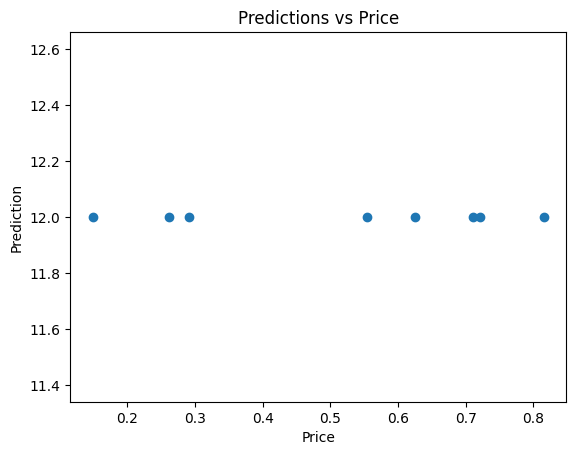

In [ ]:
import matplotlib.pyplot as plt

# Entraînement du modèle KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, y)

# Création de nouvelles données aléatoires
X_new = pd.DataFrame(np.random.rand(8, X.shape[1]), columns=X.columns)

# Prédictions sur les nouvelles données
predictions = knn.predict(X_new)

# Extraction de la variable "price" des nouvelles données
prices = X_new["price"]

# Affichage du graphe des prédictions
plt.scatter(prices, predictions)
plt.xlabel("Price")
plt.ylabel("Prediction")
plt.title("Predictions vs Price")
plt.show()
